----
----

### Project Overview: Fraud Detection using GANs (Generative Adversarial Networks)

The goal of this project is to develop a robust fraud detection system by leveraging **Generative Adversarial Networks (GANs)**. This innovative approach involves training a **GAN** on the **Credit Card Fraud Detection dataset**, using **anomaly detection** techniques to identify fraudulent transactions.

#### Key Steps:

- **Data Preprocessing:**
  - The dataset is first loaded and explored to understand its structure and identify any issues, such as missing values or imbalances between classes.
  - **Feature scaling** is performed using **MinMaxScaler** to ensure all features are on a similar scale, and **SMOTE (Synthetic Minority Over-sampling Technique)** is used to balance the dataset, addressing the issue of class imbalance in fraud detection.

- **Exploratory Data Analysis (EDA):**
  - Visualizations like histograms, scatter plots, and correlation heatmaps are generated to gain insights into the relationships between features and identify patterns or anomalies in the data.

- **Model Building:**
  - A **GAN architecture** is designed with two components:
    - A **generator** that creates synthetic fraudulent transactions based on random noise.
    - A **discriminator** that distinguishes between real and fake transactions. The discriminator is trained using both real data (fraudulent and non-fraudulent transactions) and fake data generated by the generator.
  - The GAN is trained adversarially, with the generator trying to fool the discriminator, while the discriminator learns to become more accurate at distinguishing real from fake data.

- **Training:**
  - The **training process** alternates between training the discriminator and the generator. Over time, the generator improves, producing increasingly realistic synthetic fraud data, which helps enhance the discriminator’s ability to identify fraudulent transactions.

- **Anomaly Generation and Detection:**
  - Once trained, the GAN can generate synthetic fraudulent data, which can be used for testing or augmenting real-world fraud datasets.
  - The trained discriminator is then used to classify new data as fraudulent or not, providing an effective means of detecting anomalies (fraudulent transactions).

- **Evaluation:**
  - The model is evaluated using performance metrics like **precision**, **recall**, **F1-score**, and the **confusion matrix** to assess its effectiveness in identifying fraud. The results are analyzed to determine how well the model detects fraudulent transactions while minimizing false positives and false negatives.

#### Outcome:
The result of this project is a **fraud detection system** that uses GANs to both generate synthetic fraud data and detect anomalies in financial transactions. This approach not only addresses the class imbalance problem but also improves detection capabilities by providing more diverse training data.

---

In [1]:
import warnings  # To suppress warnings

In [2]:
warnings.filterwarnings('ignore')  # Ignore all warnings

---

## 📚 Step 1: Importing Libraries
- **Overview:** Essential libraries for data manipulation, model building, visualization, and evaluation are imported.
- **Key Insights:**
  - **pandas & numpy** enable efficient data handling and computation.
  - **matplotlib & seaborn** are crucial for data visualization, helping in understanding feature distributions and relationships.
  - **sklearn** is used for preprocessing (scaling), data splitting, and model evaluation (metrics).
  - **keras** and **tensorflow** facilitate building and training deep learning models.
  - **imblearn** provides tools like SMOTE for addressing class imbalance, which is critical in fraud detection tasks.
- **Why this is important:** Proper libraries allow efficient workflow in data science and machine learning tasks.

In [3]:
import pandas as pd  # Import pandas for data handling

In [4]:
import numpy as np  # Import numpy for numerical operations

In [5]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [6]:
import seaborn as sns  # Import seaborn for statistical plots

In [7]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling


In [8]:
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data


In [9]:
from sklearn.metrics import classification_report, confusion_matrix  # Import evaluation metrics


In [10]:
from keras.models import Sequential  # Import Sequential model from Keras for GAN


In [11]:
from keras.layers import Dense, LeakyReLU  # Import Dense and LeakyReLU layers for the neural network


In [12]:
from keras.optimizers import Adam  # Import Adam optimizer for training the model


In [13]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance


In [14]:
from tensorflow.keras import initializers  # Import initializers for weight initialization


----

---

## 📥 Step 2: Load and Inspect Data
- **Overview:** The dataset is loaded into a pandas DataFrame for initial inspection and data understanding.
- **Key Insights:**
  - Inspecting the first few rows (`head()`) helps assess the structure and check for data quality issues like missing values.
  - The `info()` function reveals the data types and the presence of null values, which is essential for preprocessing.
  - **Why this is important:** This step ensures the dataset is ready for cleaning and feature engineering. Any missing or corrupted data can be identified early.

In [ ]:
file_path = "/content/creditcard.csv"  # Specify the file path for the dataset


In [ ]:
data = pd.read_csv(file_path)  # Read the dataset into a pandas DataFrame

In [ ]:
# Inspect the dataset

In [ ]:
print("Head of the dataset:")  # Print header for dataset preview
print(data.head())  # Display the first 5 rows of the dataset

Head of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

In [ ]:
print("\nInfo about the dataset:")  # Print header for dataset info
data.info()  # Display data types and non-null counts


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

In [ ]:
print("\nSummary statistics of the dataset:")  # Print header for summary statistics
print(data.describe())  # Show summary statistics (mean, std, min, max)



Summary statistics of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std   

----

----

## 🔍 Step 3: Exploratory Data Analysis
- **Overview:** Visualize the data distribution and explore relationships between features.
- **Key Insights:**
  - **Histograms:** Understanding the feature distribution helps in detecting skewness, which may require transformation.
  - **Scatter plot (Time vs. Amount):** Visualizes potential correlations or outliers between `Time` and `Amount`, aiding in anomaly detection.
  - **Correlation Heatmap:** Shows interdependencies between features, useful for feature selection and detecting multicollinearity.
- **Why this is important:** EDA helps identify data patterns, outliers, and potential issues, guiding preprocessing and feature engineering decisions.

In [ ]:
# Plotting histograms for each feature

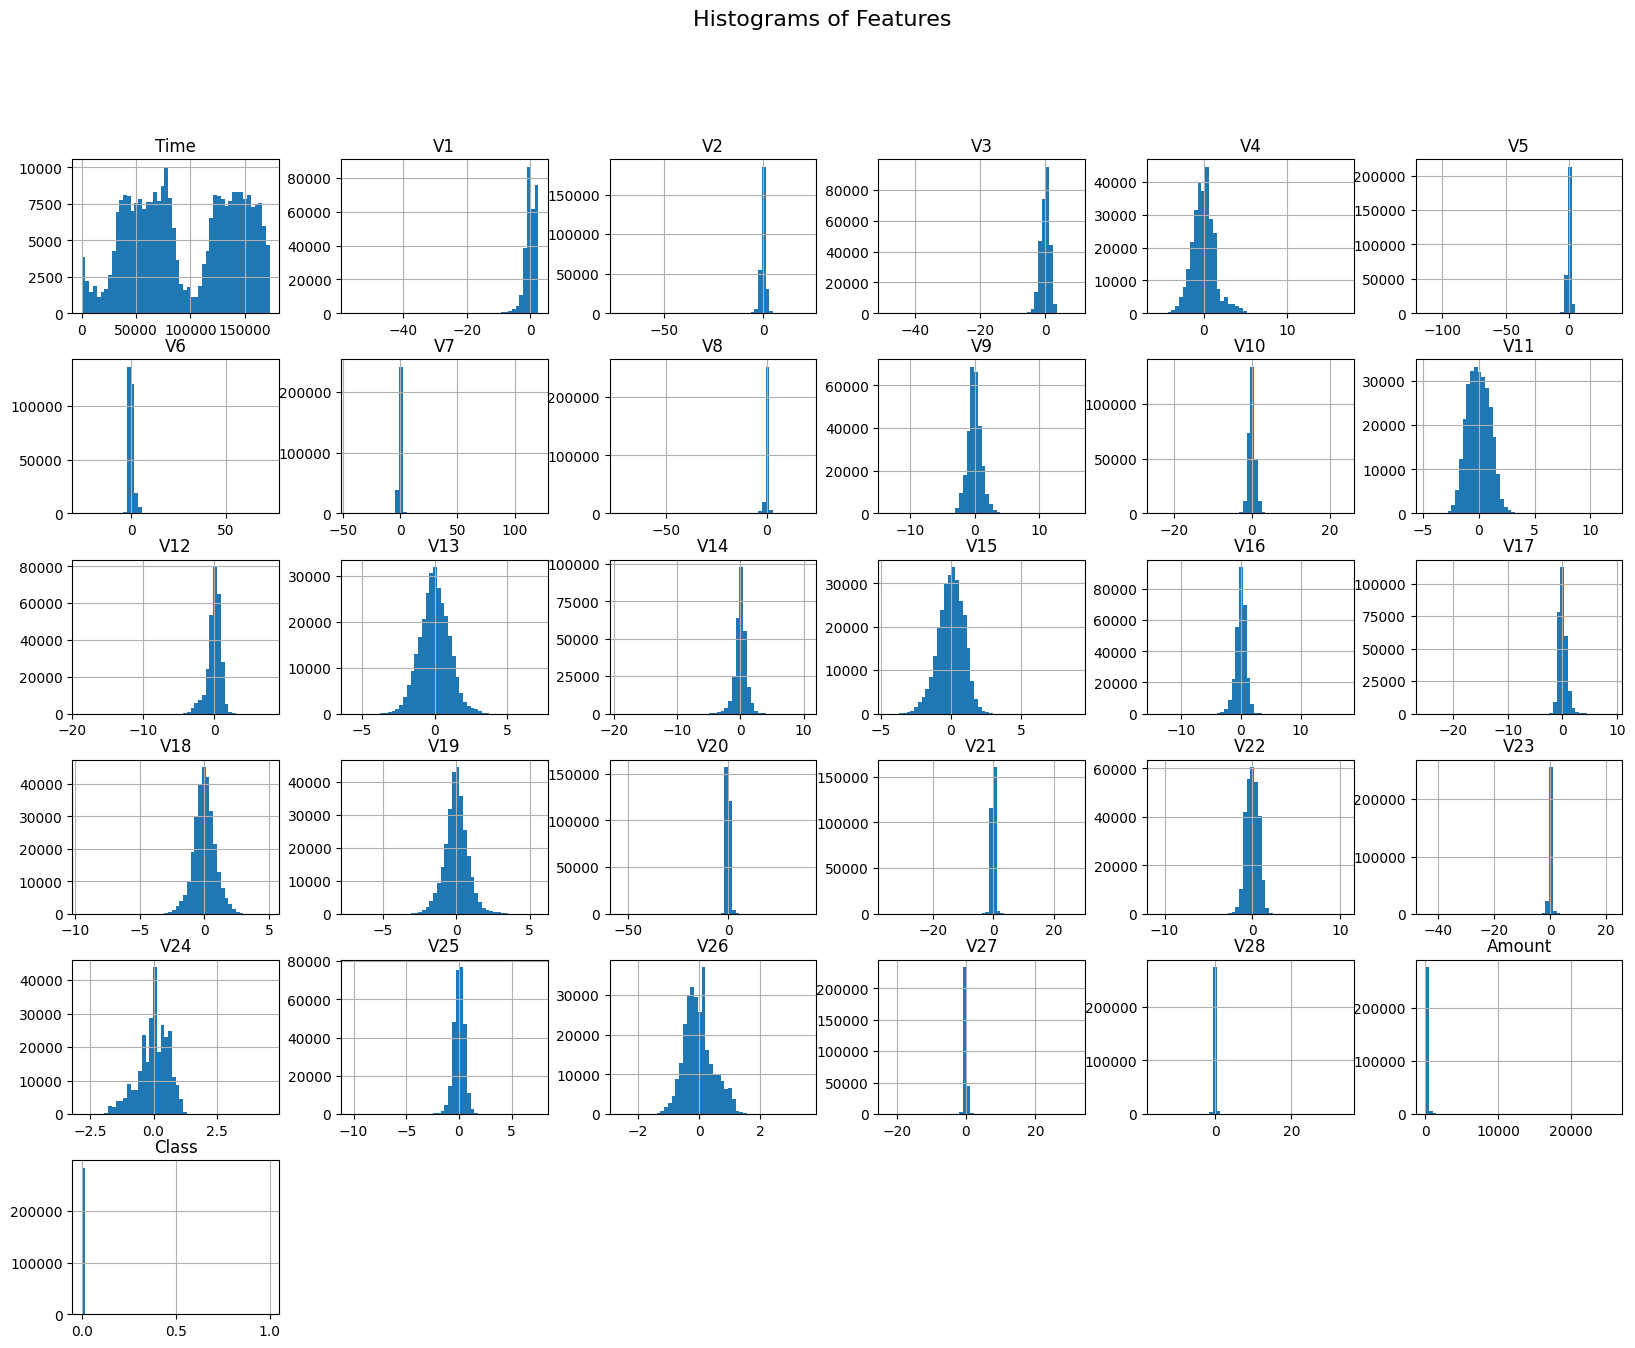

In [ ]:
data.hist(bins=50, figsize=(20, 15))  # Plot histograms of all numeric features in the dataset with 50 bins
plt.suptitle('Histograms of Features', fontsize=16)  # Set the title of the histogram plot
plt.show()  # Display the histogram plots

In [ ]:
# Scatter plot of Time vs Amount to visualize data distribution

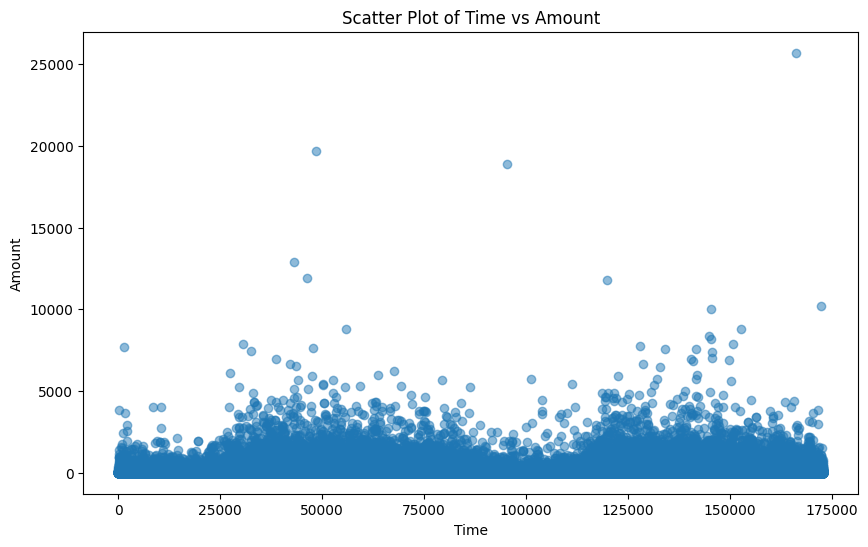

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the scatter plot
plt.scatter(data['Time'], data['Amount'], alpha=0.5)  # Plot a scatter plot between 'Time' and 'Amount'
plt.title('Scatter Plot of Time vs Amount')  # Set the title of the scatter plot
plt.xlabel('Time')  # Set the label for the x-axis
plt.ylabel('Amount')  # Set the label for the y-axis
plt.show()  # Display the scatter plot

In [ ]:
# Correlation Heatmap to visualize correlations between features

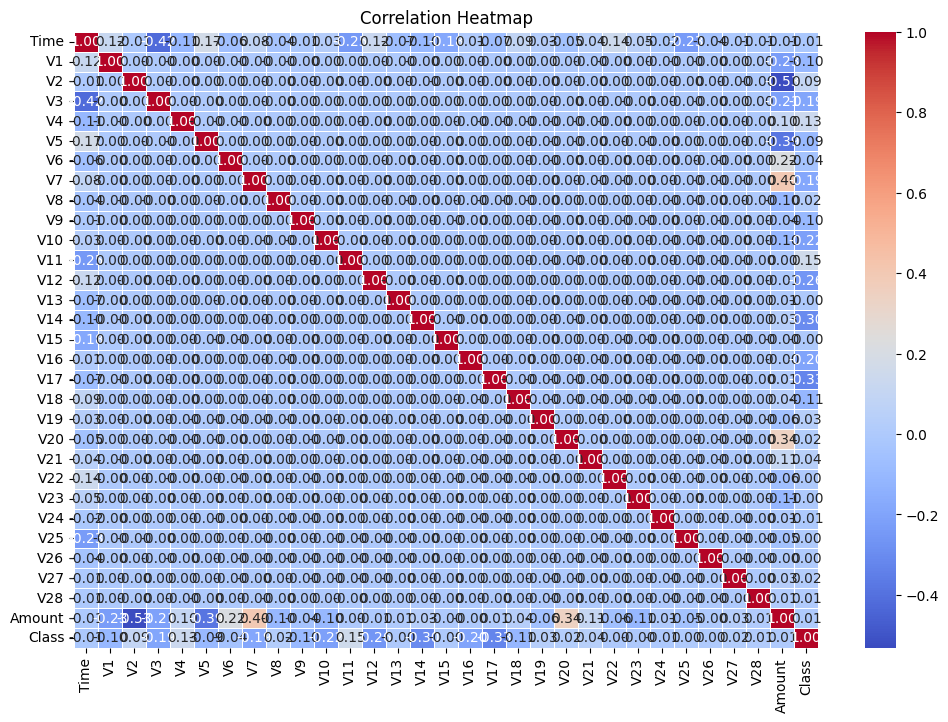

In [ ]:
correlation_matrix = data.corr()  # Compute the correlation matrix of the dataset
plt.figure(figsize=(12, 8))  # Set the size of the heatmap plot
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)  # Plot the heatmap of correlations
plt.title('Correlation Heatmap')  # Set the title of the heatmap plot
plt.show()  # Display the heatmap

----

---

## 🧹 Step 4: Preprocessing Data
- **Overview:** Scaling continuous variables and splitting the dataset into features and target.
- **Key Insights:**
  - **MinMaxScaler**: Scaling ensures that features are within a similar range, preventing any one feature from dominating the model due to differences in magnitude.
  - **Feature-Target Split**: Separating `X` (features) and `y` (target) is a crucial step for supervised learning.
- **Why this is important:** Feature scaling and proper splitting of data are key to training an effective model, ensuring fair weight allocation during training.

In [ ]:
# Preprocessing

In [ ]:
# Normalize the features (Time and Amount) using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()  # Initialize MinMaxScaler for scaling features

In [ ]:
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])  # Scale 'Time' and 'Amount' columns


In [ ]:
# Separate features (X) and target (y)

In [ ]:
X = data.drop(['Class'], axis=1)  # Drop the target column 'Class' to create features (X)


In [ ]:
y = data['Class']  # Set the target variable (y) as 'Class'

---

----

## ⚖️ Step 5: Handle Class Imbalance with SMOTE
- **Overview:** Address class imbalance in the dataset using SMOTE.
- **Key Insights:**
  - **SMOTE** generates synthetic samples of the minority class to create a balanced dataset, reducing the model's bias toward the majority class.
  - Imbalanced classes can severely affect model performance, particularly in fraud detection where fraudulent transactions are rare.
- **Why this is important:** Balancing the dataset enhances model accuracy and ensures it learns to identify anomalies without being biased toward the majority class.

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Initialize SMOTE to balance classes


In [ ]:
X_res, y_res = smote.fit_resample(X, y)  # Apply SMOTE to the features and target


----

----

## 🧩 Step 6: Split Data into Training and Test Sets
- **Overview:** Split the resampled dataset into training and testing sets.
- **Key Insights:**
  - The **80/20 split** (training/test) ensures that the model is trained on a large portion of the data while being evaluated on unseen data.
  - This step is essential for evaluating the generalization ability of the model.
- **Why this is important:** Ensures the model's ability to generalize to new, unseen data and prevents overfitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)  # Split data into training and test sets


----

----

## 🚀 Step 7: Build the Generator Model
- **Overview:** Create a neural network that generates synthetic fraud instances from random noise.
- **Key Insights:**
  - The generator's **Dense layers** increase in size, allowing it to learn complex representations.
  - The use of **LeakyReLU** activations improves learning by avoiding dying neurons compared to standard ReLU.
  - **Tanh output** ensures the generated data lies within the same range as real data, which is crucial for the discriminator to correctly classify the fake data.
- **Why this is important:** The generator's ability to create realistic data is critical for training the discriminator effectively and generating synthetic anomalies.

In [ ]:
# GAN Model Setup

In [ ]:
def build_generator(latent_dim):  # Function to build the generator model
    model = Sequential()  # Initialize the sequential model
    model.add(Dense(128, input_dim=latent_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))  # Add input layer
    model.add(LeakyReLU(alpha=0.2))  # Add LeakyReLU activation function
    model.add(Dense(256))  # Add a dense layer with 256 neurons
    model.add(LeakyReLU(alpha=0.2))  # Add another LeakyReLU activation
    model.add(Dense(512))  # Add a dense layer with 512 neurons
    model.add(LeakyReLU(alpha=0.2))  # Add LeakyReLU activation
    model.add(Dense(X_train.shape[1], activation='tanh'))  # Output layer with tanh activation for data generation
    return model  # Return the generator model

-----

----

## 🔍 Step 8: Build the Discriminator Model
- **Overview:** Create a neural network that classifies data as real or fake.
- **Key Insights:**
  - **Dense layers** of decreasing size allow the model to learn features and representations from high-dimensional data.
  - **LeakyReLU** helps in training by ensuring no neurons die out during backpropagation.
  - The **sigmoid activation** is perfect for binary classification, outputting a probability of whether the data is real or fake.
- **Why this is important:** The discriminator’s accuracy determines the quality of the synthetic data generated by the GAN, so it’s crucial for effective fraud detection.

In [ ]:
def build_discriminator(input_dim):  # Function to build the discriminator model
    model = Sequential()  # Initialize the sequential model
    model.add(Dense(512, input_dim=input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))  # Add input layer
    model.add(LeakyReLU(alpha=0.2))  # Add LeakyReLU activation
    model.add(Dense(256))  # Add dense layer with 256 neurons
    model.add(LeakyReLU(alpha=0.2))  # Add LeakyReLU activation
    model.add(Dense(128))  # Add dense layer with 128 neurons
    model.add(LeakyReLU(alpha=0.2))  # Add LeakyReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model  # Return the discriminator model

----

-----

## 🔄 Step 9: Build the GAN Model
- **Overview:** Combine the generator and discriminator into a single model for adversarial training.
- **Key Insights:**
  - **Freezing the discriminator** during generator training ensures that the generator improves without interference from a discriminator that has already learned to classify real vs fake.
  - By combining the generator and discriminator, the GAN is able to generate realistic synthetic data while avoiding mode collapse.
- **Why this is important:** The GAN structure allows the generator to improve through feedback from the discriminator, producing increasingly realistic data.

In [ ]:
def build_gan(generator, discriminator):  # Function to build the GAN model by combining generator and discriminator
    discriminator.trainable = False  # Freeze the discriminator during generator training
    model = Sequential()  # Initialize the sequential model
    model.add(generator)  # Add generator to the model
    model.add(discriminator)  # Add discriminator to the model
    return model  # Return the combined GAN model

---

---

## 🔧 Step 10: Set Hyperparameters
- **Overview:** Define key hyperparameters for GAN training.
- **Key Insights:**
  - **Latent Dimension (100):** The size of the random noise vector that feeds the generator. A higher latent dimension can create more diverse data but requires more computation.
  - **Epochs (50):** A balance between sufficient training and computational efficiency. Lower epochs speed up the process but may affect performance.
  - **Batch Size (128):** Controls the number of samples used in each training step. A higher batch size typically leads to more stable training.
- **Why this is important:** Choosing the right hyperparameters ensures optimal training of the GAN without overfitting or underfitting.

In [ ]:
# Hyperparameters

In [ ]:
latent_dim = 100  # Latent space dimension for the generator

In [ ]:
epochs = 50  # Reduced epochs to 50 for faster execution

In [ ]:
batch_size = 128  # Batch size for training

In [ ]:
half_batch = batch_size // 2  # Half batch size for discriminator training

In [ ]:
# Build the models

In [ ]:
discriminator = build_discriminator(X_train.shape[1])  # Build discriminator model


In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])  # Compile discriminator


In [ ]:
generator = build_generator(latent_dim)  # Build generator model

In [ ]:
gan = build_gan(generator, discriminator)  # Build GAN by combining generator and discriminator


In [ ]:
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))  # Compile the GAN model


----

----

## 🎓 Step 11: Train the GAN
- **Overview:** Train the GAN by alternating between training the generator and the discriminator.
- **Key Insights:**
  - **Discriminator Training:** Half the batch is real data, half is generated data. The discriminator’s role is to classify real and fake data.
  - **Generator Training:** The generator is trained to improve its output to fool the discriminator into thinking its fake data is real.
  - Print losses at regular intervals to monitor the progress.
- **Why this is important:** Properly alternating training between the generator and discriminator ensures the GAN improves over time and avoids mode collapse.

In [ ]:
def train_gan(epochs, batch_size, half_batch):  # Function to train the GAN model
    for epoch in range(epochs):  # Loop through each epoch
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)  # Select a random half batch of real data
        real_data = X_train.iloc[idx]  # Get the real data samples
        fake_data = generator.predict(np.random.normal(0, 1, (half_batch, latent_dim)))  # Generate fake data from noise

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))  # Train discriminator on real data
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))  # Train discriminator on fake data
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Average the losses from real and fake data

        # Train Generator
        g_loss = gan.train_on_batch(np.random.normal(0, 1, (batch_size, latent_dim)), np.ones((batch_size, 1)))  # Train generator

        if epoch % 10 == 0:  # Print progress every 10 epochs
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]*100}%] [G loss: {g_loss}]")  # Print losses


In [ ]:
train_gan(epochs, batch_size, half_batch)  # Train the GAN for specified epochs and batch size


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
0 [D loss: 0.6867884397506714 | D accuracy: 41.796875%] [G loss: [array(0.6897079, dtype=float32), array(0.6897079, dtype=float32), array(0.2890625, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10 [D loss: 0.6893662810325623 | D accuracy: 32.648470997810364%] [G loss: [array(0.6899691, dtype=float32), array(0.6899691, dtype=float32), array(0.31889203, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━

----

---

## 🧪 Step 12: Generate Anomalous Data
- **Overview:** Use the trained generator to create synthetic anomalies.
- **Key Insights:**
  - Random noise is passed through the generator, which transforms it into synthetic data that resembles fraudulent transactions.
  - This synthetic data can be used for testing or augmenting real-world fraud datasets.
- **Why this is important:** Synthetic anomalies help in evaluating and testing fraud detection systems, especially when real fraudulent data is scarce.

In [ ]:
def generate_anomalies(n_samples):  # Function to generate synthetic anomalous data
    noise = np.random.normal(0, 1, (n_samples, latent_dim))  # Generate random noise as input for the generator
    generated_data = generator.predict(noise)  # Generate fake data (anomalies)
    return generated_data  # Return generated anomalous data

----

----

## 📊 Step 13: Predict Anomalies on Test Data
- **Overview:** Use the trained discriminator to classify test data as fraudulent or not.
- **Key Insights:**
  - **Predictions** are based on the likelihood that a test sample is fraudulent, with a threshold of 0.5 to classify as fraud.
  - This step is crucial for assessing the model’s performance on unseen data.
- **Why this is important:** The ability to accurately predict anomalies in new data is the core functionality of a fraud detection system.

In [ ]:
def predict_anomalies(test_data):  # Function to predict anomalies using the discriminator
    predictions = discriminator.predict(test_data)  # Get predictions from the discriminator
    return predictions  # Return the predicted anomaly scores

---

---

## 📈 Step 14: Evaluate Model Performance
- **Overview:** Evaluate the model using performance metrics like precision, recall, and F1-score.
- **Key Insights:**
  - **Classification report** gives insights into how well the model is performing on both classes (fraudulent vs. non-fraudulent).
  - Helps to understand trade-offs between **false positives** and **false negatives**, especially in fraud detection where misclassifying fraud as normal can be costly.
- **Why this is important:** Provides a comprehensive view of the model's strengths and weaknesses, which is crucial for tuning and improving the system.

In [ ]:
# Evaluate the model on test data

In [ ]:
predictions = predict_anomalies(X_test)  # Get anomaly predictions for the test set


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


In [ ]:
# Save the predictions to a CSV file

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['Anomaly_Score'])  # Create DataFrame for predictions


In [ ]:
predictions_df['True_Class'] = y_test.values  # Add true class labels to the predictions DataFrame


In [ ]:
predictions_df.to_csv('anomaly_predictions.csv', index=False)  # Save the predictions to a CSV file


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, predictions > 0.5))  # Print classification report



Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.40      0.50     56750
           1       0.57      0.80      0.67     56976

    accuracy                           0.60    113726
   macro avg       0.62      0.60      0.58    113726
weighted avg       0.62      0.60      0.58    113726



---

---

## 🧩 Step 15: Confusion Matrix
- **Overview:** Visualize the performance using a confusion matrix.
- **Key Insights:**
  - The confusion matrix shows true positives (correct fraud detection), false positives (normal transactions wrongly marked as fraud), and so on.
  - Plotting the confusion matrix provides a visual understanding of model performance.
- **Why this is important:** A confusion matrix helps identify where the model is making errors, which can be useful for fine-tuning and improving the fraud detection system.

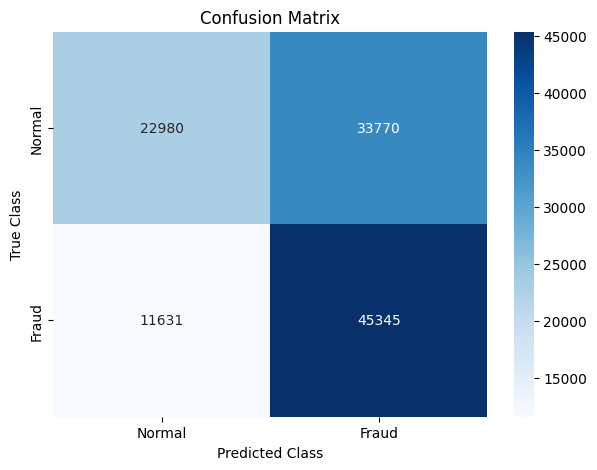

In [ ]:
cm = confusion_matrix(y_test, predictions > 0.5)  # Generate confusion matrix
plt.figure(figsize=(7, 5))  # Set the size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])  # Plot confusion matrix
plt.title("Confusion Matrix")  # Set title for the confusion matrix plot
plt.ylabel('True Class')  # Set the y-axis label
plt.xlabel('Predicted Class')  # Set the x-axis label
plt.show()  # Display the confusion matrix plot

----
----